$\Huge{\textbf{Clouds Course}}$

$\normalsize{\textbf{Assignment 2 Deliverable}}$

---

$\color{blue}\textbf{Name :}$

$\boxed{\text{        Brice Robert          }}$

$\color{blue}\textbf{Email :}$

$\boxed{\text{robert@eurecom.fr}}$

---

$\color{blue}\textbf{Run Locust for 3 minutes each on :}$

$\color{blue}\textbf{(i) locally deployed numericalintegral, }$

$\color{blue}\textbf{(ii) VM scaleset with 2 VMs where you shutdown the VM running the workload after 1 minute, }$

$\color{blue}\textbf{(iii) autoscale webapp initially configured with 1 instance and max 3, }$

$\color{blue}\textbf{(iv) autoscale function. Save locust output. }$


$\color{blue}\textbf{Plot a graph of number of successful requests/seconds with one line }$

$\color{blue}\textbf{for each of the four cases above.}$

$\color{blue}\textbf{Paste the graph below.}$

---

$\color{blue} \textbf{Your answer:}$ 


- [ ] Locust File Extractions

All the CSV extractions from Local, WebApp, Function, ScaleSet are explaine here https://github.com/setrar/Clouds/tree/main/Labs/Azure/lab2/locust

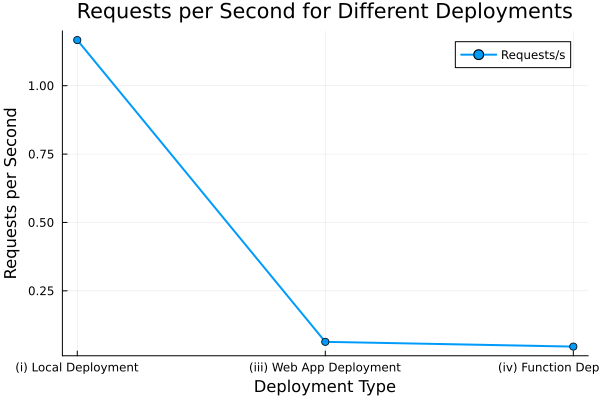

In [20]:
using CSV, DataFrames, Plots

# Load the data from all three sources
data_local = CSV.read("locust/logs/locust_log-local-u10r2t3.csv_stats.csv", DataFrame)
data_webapp = CSV.read("locust/logs/locust_log-webapp-u10r2t3.csv_stats.csv", DataFrame)
data_function = CSV.read("locust/logs/locust_log-function-u10r2t3.csv_stats.csv", DataFrame)

# Extract the Requests/s field for all sources
requests_local = data_local."Requests/s"[1]  # Assuming we take the aggregated row
requests_webapp = data_webapp."Requests/s"[1]  # Assuming we take the aggregated row
requests_function = data_function."Requests/s"[1]  # Assuming we take the aggregated row

# Create labels for the deployments (as x-axis points)
deployments = [1, 2, 3]  # Assign numeric labels for Local, Web App, Function
deployment_labels = ["(i) Local Deployment", "(iii) Web App Deployment", "(iv) Function Deployment"]

# Create the corresponding requests/s values
requests = [requests_local, requests_webapp, requests_function]

# Plot the data as a line
plot(
    deployments, 
    requests,
    xlabel="Deployment Type", 
    xticks=(deployments, deployment_labels), 
    ylabel="Requests per Second", 
    title="Requests per Second for Different Deployments",
    label="Requests/s",
    lw=2, 
    marker=:circle,
    grid=true
)

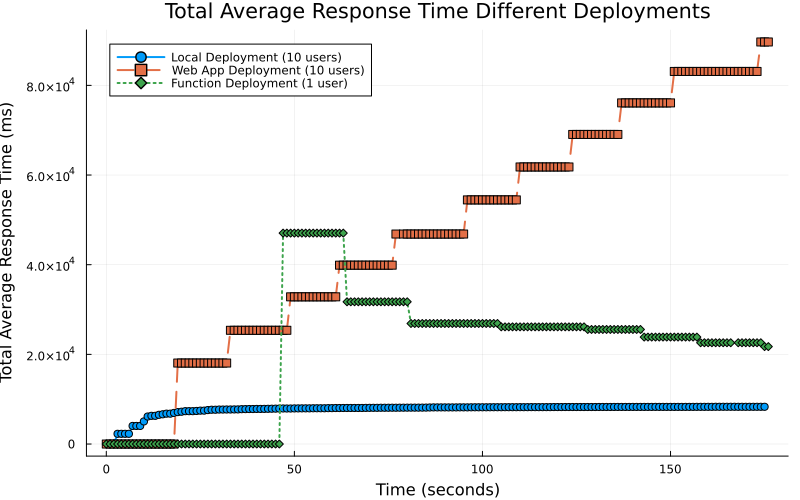

In [19]:
using CSV, DataFrames, Plots

# Load the data for all three sources
data_local = CSV.read("locust/logs/locust_log-local-u10r2t3.csv_stats_history.csv", DataFrame)
data_webapp = CSV.read("locust/logs/locust_log-webapp-u10r2t3.csv_stats_history.csv", DataFrame)
data_function = CSV.read("locust/logs/locust_log-function-u10r2t3.csv_stats_history.csv", DataFrame)

# Convert timestamps from Unix time to seconds relative to the start of the test
timestamps_local = data_local.Timestamp .- minimum(data_local.Timestamp)
timestamps_webapp = data_webapp.Timestamp .- minimum(data_webapp.Timestamp)
timestamps_function = data_function.Timestamp .- minimum(data_function.Timestamp)

# Extract Total Average Response Time for all sources
avg_response_time_local = data_local."Total Average Response Time"
avg_response_time_webapp = data_webapp."Total Average Response Time"
avg_response_time_function = data_function."Total Average Response Time"

# Plot Total Average Response Time for Local Deployment
plot(
    timestamps_local, 
    avg_response_time_local,
    xlabel="Time (seconds)", 
    ylabel="Total Average Response Time (ms)", 
    title="Total Average Response Time Different Deployments", 
    label="Local Deployment (10 users)", 
    lw=2, 
    marker=:circle, 
    grid=true,
    size = (800,500)
)

# Add Total Average Response Time for Web App Deployment
plot!(
    timestamps_webapp, 
    avg_response_time_webapp,
    label="Web App Deployment (10 users)", 
    lw=2, 
    marker=:square, 
    linestyle=:dash
)

# Add Total Average Response Time for Function Deployment
plot!(
    timestamps_function, 
    avg_response_time_function,
    label="Function Deployment (1 user)", 
    lw=2, 
    marker=:diamond, 
    linestyle=:dot
)

--- 

$\color{blue}\textbf{What is the address of the numerical integrap webapp where we can access your site?}$

--- 

$\color{blue} \textbf{Your answer:}$ https://webappclouds2025nibr.azurewebsites.net/numericalintegralservice/0/3.14156

--- 

$\color{blue}\textbf{What is the address of the numerical integrap function deployment?}$

--- 

$\color{blue} \textbf{Your answer:}$  https://clouds25lab2eurbrnifnc.azurewebsites.net/api/numericalintegralservice/0/3.14156

--- 

$\color{blue}\textbf{What is the address of the mapreduce durable function deployment where can invoke it?}$

--- 

$\color{blue} \textbf{Your answer:}$ https://clouds25brlab2mrfnc.azurewebsites.net/

--- 

$\color{blue}\textbf{What is the gitlab URL where you have saved your assignment code?}$

--- 

$\color{blue} \textbf{Your answer:}$ 

- Source Code for all IaC management

https://github.com/setrar/Clouds/tree/main/Labs/Azure/lab2

- Source Code for Numerical Integration (used by the Local App and the WebApp)

https://github.com/setrar/CloudsNumericalIntegration

- Source Code for Numerical Integration Function

https://github.com/setrar/CloudsNIFunction

- (attempted) Source Code for MR function

https://github.com/setrar/CloudsMRFunction

